In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-3c6f315d4026>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1) # membaca file edf dan menyimpannya di data1


<RawEDF | chb05_13.edf, 23 x 921600 (3600.0 s), ~27 kB, data not loaded>

In [ ]:
# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

In [ ]:
channel_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
# Membuat DataFrame dengan data EEG dan waktu
df1 = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df1['Time'] = times  # Menambahkan kolom waktu
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625


In [ ]:
print(df1.shape) #23 baris dan 921600 kolom

(921600, 24)


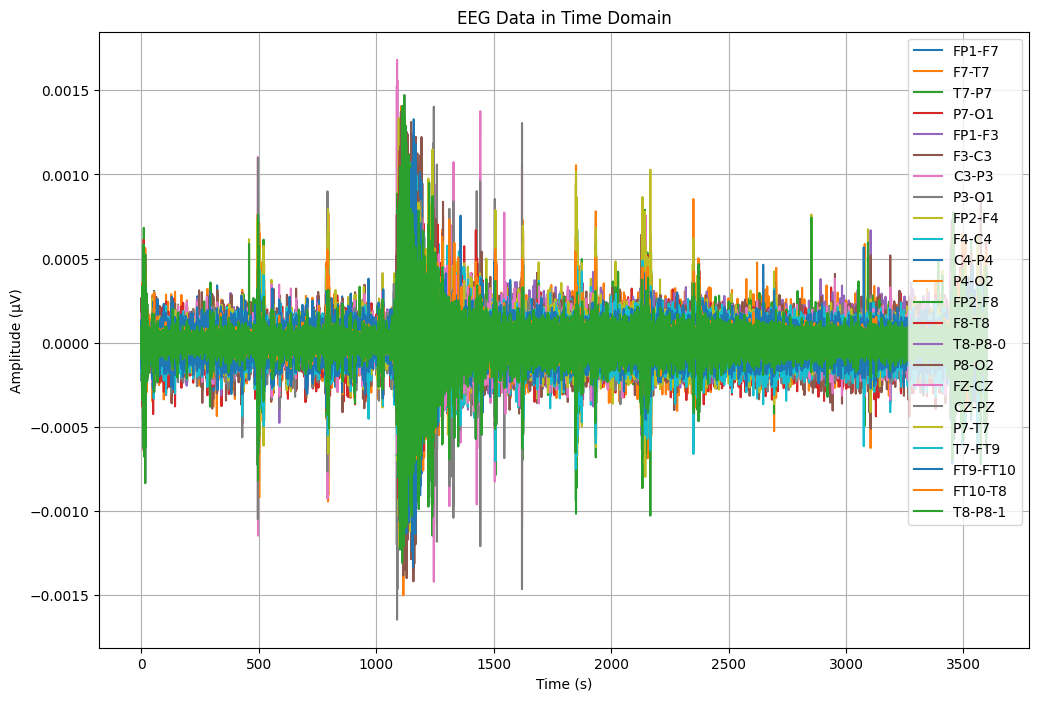

In [ ]:
# Time Domain
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 968   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 1359    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = df1.iloc[start_index:end_index]



In [ ]:
# Simpan data yang sudah dipotong
df_cut.to_csv("/content/drive/MyDrive/TA/new_chb05_13.csv", index=False)

In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/new_chb05_13.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000046,0.000129,0.000028,-0.000206,-1.953602e-07,0.000023,0.000048,-0.000072,-0.000069,-0.000024,...,-0.000002,-0.000050,-0.000108,-0.000007,-0.000028,-0.000062,-0.000119,-1.738706e-05,-0.000002,968.000000
1,0.000047,0.000129,0.000034,-0.000209,9.768010e-07,0.000028,0.000042,-0.000069,-0.000066,-0.000028,...,-0.000008,-0.000045,-0.000103,-0.000012,-0.000033,-0.000063,-0.000118,-1.582418e-05,-0.000008,968.003906
2,0.000044,0.000129,0.000038,-0.000209,1.367521e-06,0.000033,0.000035,-0.000066,-0.000065,-0.000030,...,-0.000012,-0.000042,-0.000104,-0.000015,-0.000038,-0.000079,-0.000115,-1.953602e-07,-0.000012,968.007812
3,0.000044,0.000129,0.000044,-0.000212,9.768010e-07,0.000038,0.000029,-0.000063,-0.000057,-0.000032,...,-0.000011,-0.000041,-0.000102,-0.000020,-0.000043,-0.000071,-0.000119,-4.493284e-06,-0.000011,968.011719
4,0.000044,0.000125,0.000046,-0.000210,1.953602e-07,0.000040,0.000023,-0.000058,-0.000052,-0.000033,...,-0.000010,-0.000038,-0.000097,-0.000020,-0.000046,-0.000055,-0.000122,-1.934066e-05,-0.000010,968.015625


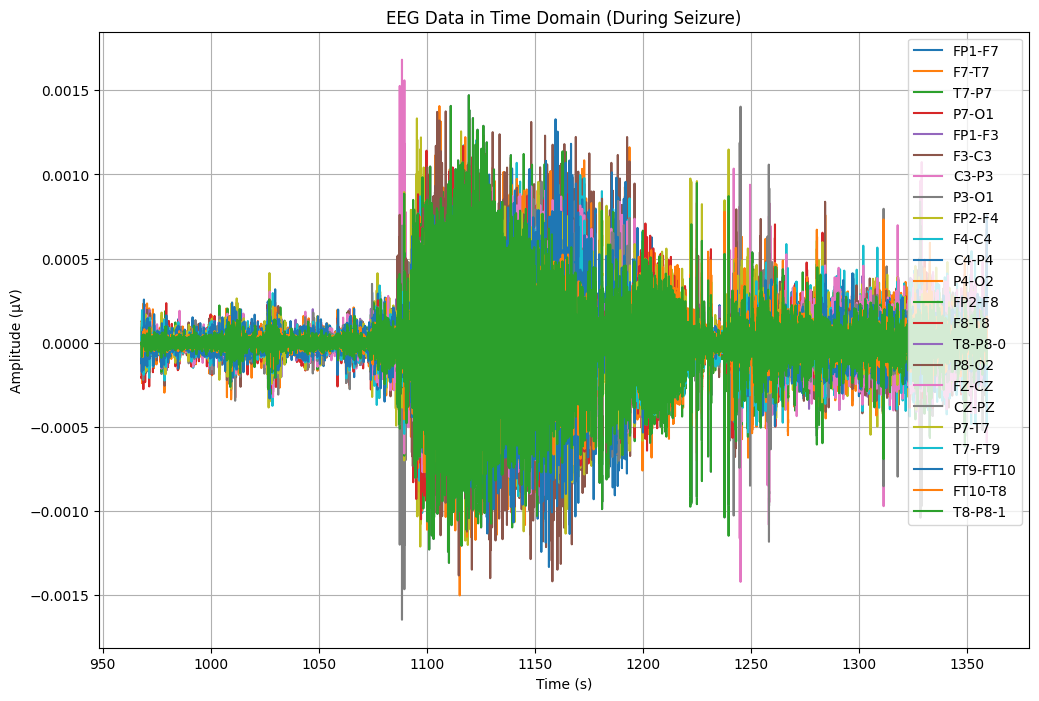

In [ ]:
# menampilkan data yang sudah dipotong dalam domain time
# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = TA1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in TA1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


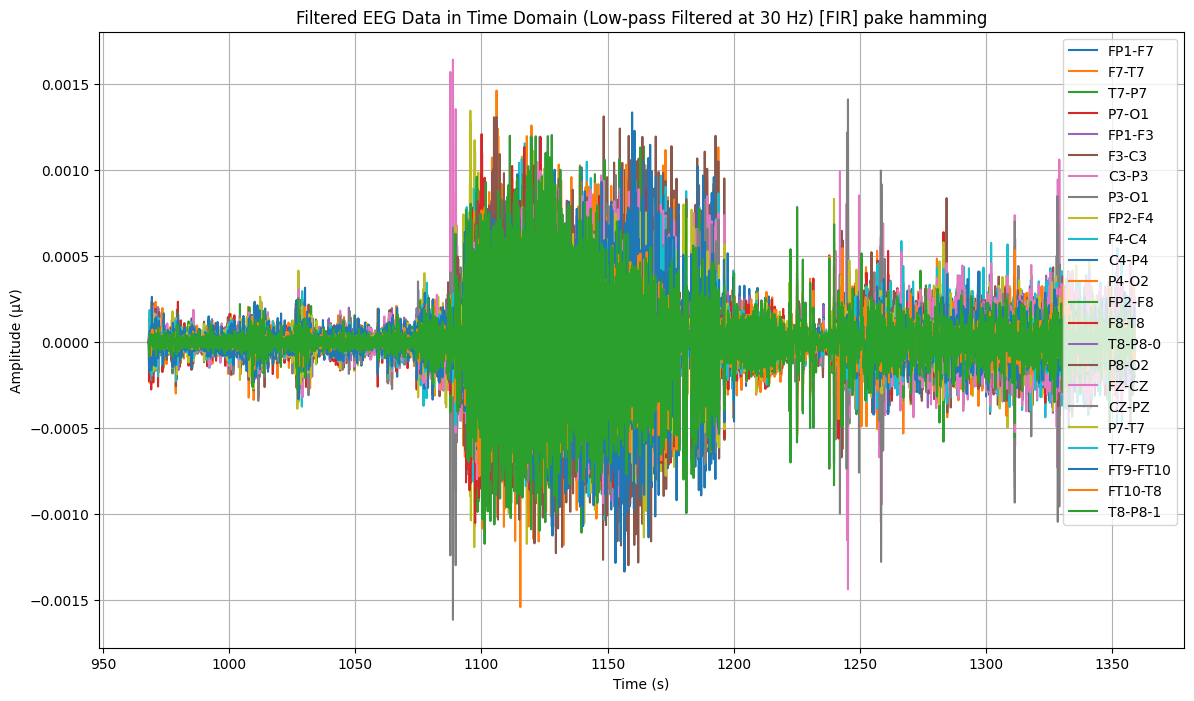

In [ ]:
# ini lowpass pake ini hamming
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter low-pass menggunakan FIR
def low_pass_filter_fir(data, cutoff, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, cutoff / nyquist, pass_zero='lowpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter FIR pada data EEG
filtered_data = low_pass_filter_fir(eeg_data, cutoff_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Low-pass Filtered at 30 Hz) [FIR] pake hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


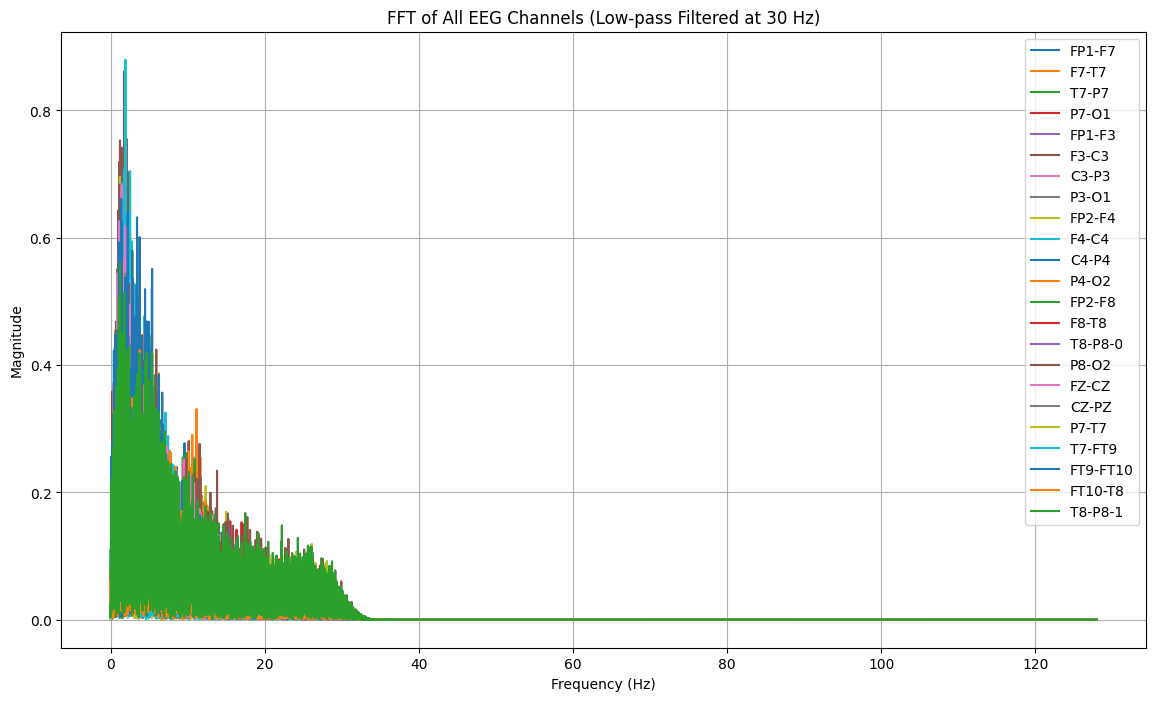

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1088:
        return "tidak kejang"
    elif 1088 <= row['Time'] < 1239:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

         Time       seizure        FP1-F7         F7-T7         T7-P7  \
0  968.000000  tidak kejang -1.824933e-08 -5.074392e-08 -1.116520e-08   
1  968.003906  tidak kejang -4.304525e-08 -1.185606e-07 -2.820908e-08   
2  968.007812  tidak kejang -6.045273e-08 -1.693100e-07 -4.405323e-08   
3  968.011719  tidak kejang -6.057662e-08 -1.732390e-07 -5.149776e-08   
4  968.015625  tidak kejang -3.990782e-08 -1.182676e-07 -4.533345e-08   

          P7-O1        FP1-F3         F3-C3         C3-P3         P3-O1  ...  \
0  8.108246e-08  7.700139e-11 -9.009162e-09 -1.886534e-08  2.841351e-08  ...   
1  1.904310e-07 -2.823322e-10 -2.302414e-08 -4.171061e-08  6.506847e-08  ...   
2  2.729909e-07 -9.756852e-10 -3.651540e-08 -5.449535e-08  9.049525e-08  ...   
3  2.815344e-07 -1.481491e-09 -4.380011e-08 -4.738641e-08  8.881539e-08  ...   
4  1.970519e-07 -1.237005e-09 -4.010041e-08 -1.904099e-08  5.433768e-08  ...   

          F8-T8       T8-P8-0         P8-O2         FZ-CZ         CZ-PZ  \
0  7.

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/hamming_chb05_13.csv", index=False)

In [ ]:
# mengklasifikasikan menggunakan random forest

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Make sure to import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import the function from the correct module

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Import the necessary module
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))


# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      kejang       0.99      0.96      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.98     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.98      0.98      0.98     20020

Akurasi: 0.9844155844155844
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       0.99      0.96      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.98     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.98      0.98      0.98     20020



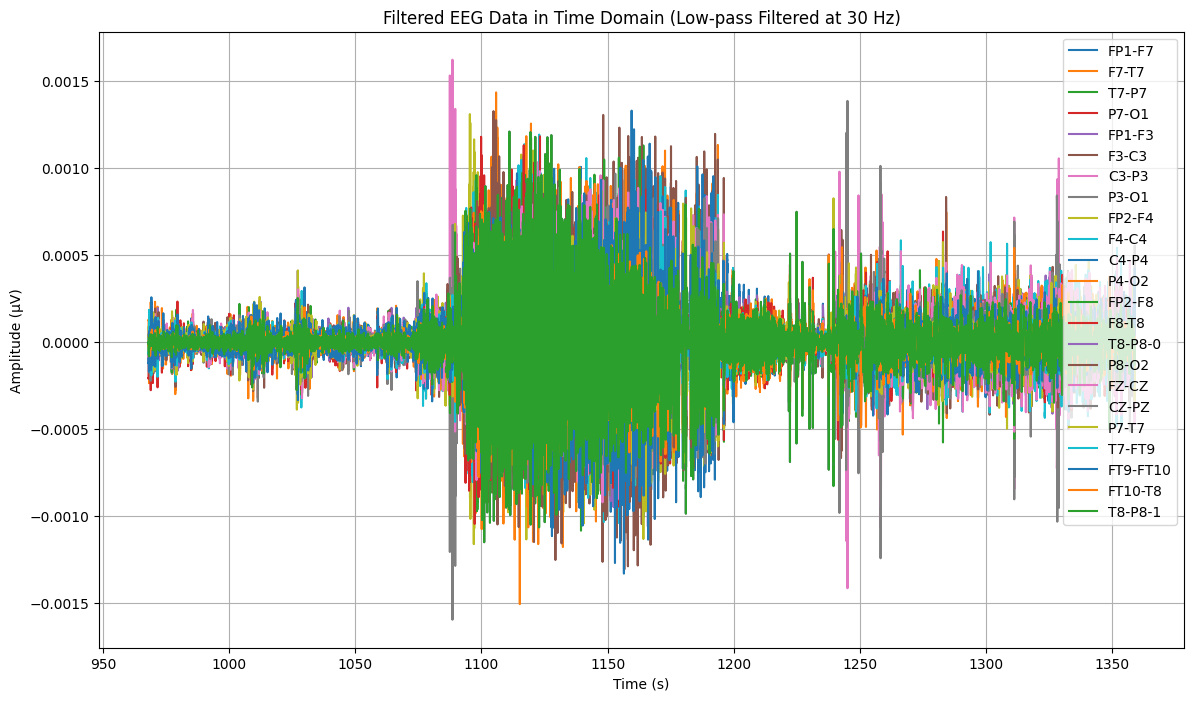

In [ ]:
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter low-pass
def low_pass_filter(data, cutoff, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisasi frekuensi cutoff
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Koefisien filter
    filtered_data = filtfilt(b, a, data, axis=0)  # Terapkan filter pada data (axis=0 untuk kolom)
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
filter_order = 4  # Orde filter

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter pada data EEG
filtered_data = low_pass_filter(eeg_data, cutoff_freq, sampling_rate, filter_order)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Low-pass Filtered at 30 Hz) butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


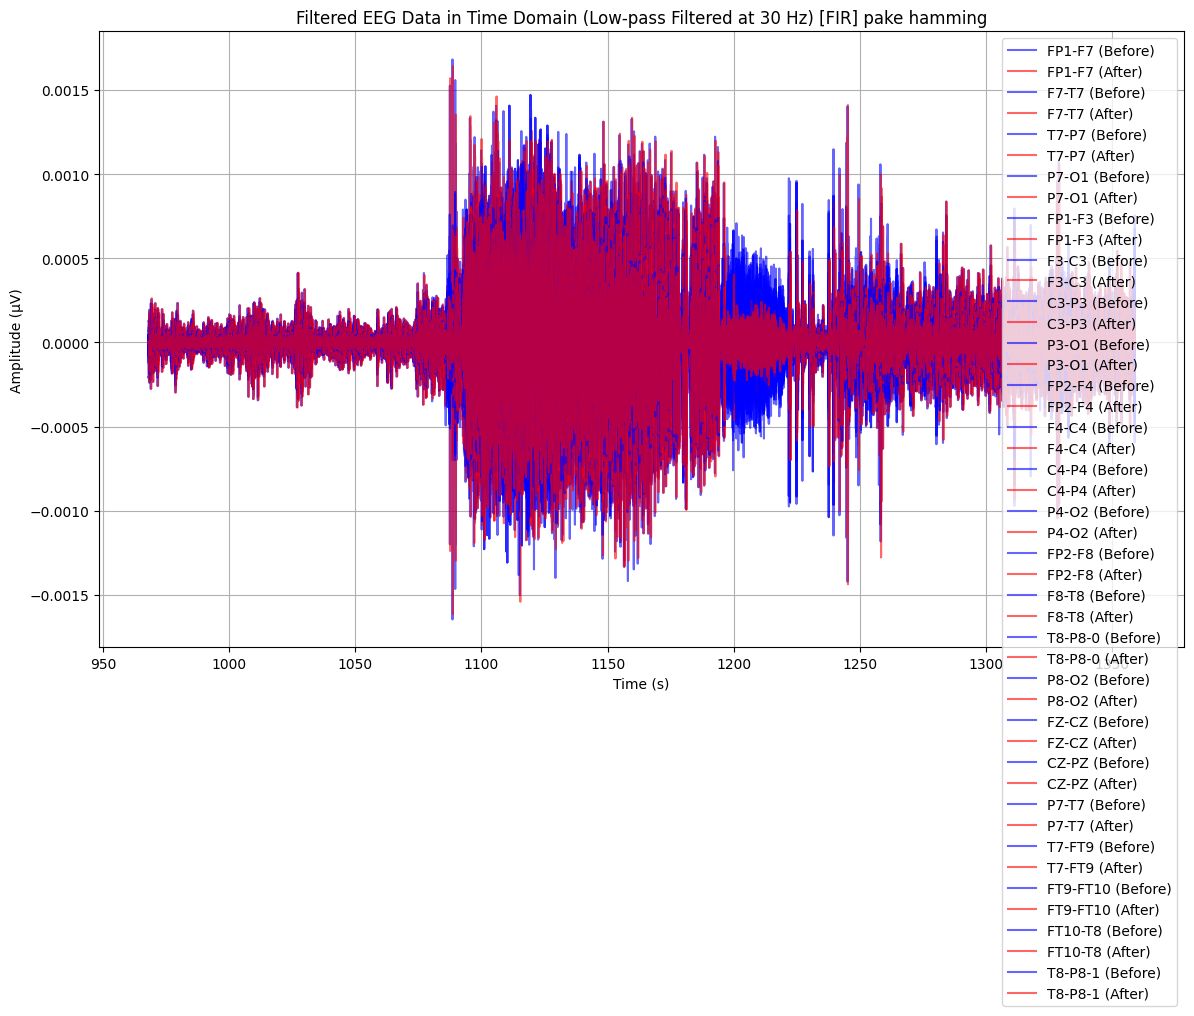

In [ ]:
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter low-pass menggunakan FIR
def low_pass_filter_fir(data, cutoff, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, cutoff / nyquist, pass_zero='lowpass', window='hamming')  # Desain koefisien filter FIR dengan Hamming window
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter FIR pada data EEG
filtered_data = low_pass_filter_fir(eeg_data, cutoff_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        # Plot data asli (sebelum filter) dengan warna biru
        plt.plot(filtered_df['Time'], TA1[channel], label=f'{channel} (Before)', color='blue', alpha=0.6)
        # Plot data yang sudah difilter dengan warna merah
        plt.plot(filtered_df['Time'], filtered_df[channel], label=f'{channel} (After)', color='red', alpha=0.6)

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Low-pass Filtered at 30 Hz) [FIR] pake hamming')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


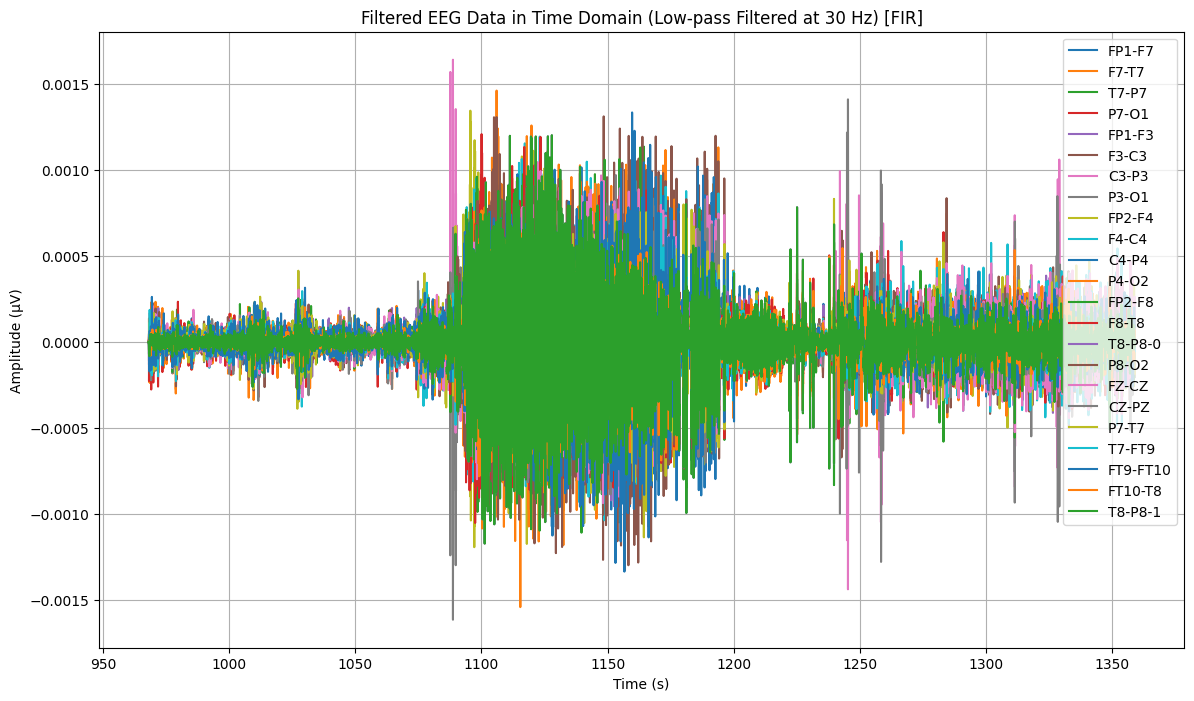

In [ ]:
# ini lowpass pake hanning
from scipy.signal import firwin, lfilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat filter low-pass menggunakan FIR
def low_pass_filter_fir(data, cutoff, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    taps = firwin(num_taps, cutoff / nyquist, pass_zero='lowpass')  # Desain koefisien filter FIR
    filtered_data = lfilter(taps, 1.0, data, axis=0)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
num_taps = 101  # Panjang filter (orde + 1)

# Mengambil data waktu dan sinyal EEG dari data yang sudah dipotong (TA1)
time = TA1['Time'].values  # Kolom waktu
eeg_columns = TA1.columns[:-1]  # Semua kolom kecuali 'Time' (saluran EEG)
eeg_data = TA1[eeg_columns].values  # Data EEG

# Terapkan filter FIR pada data EEG
filtered_data = low_pass_filter_fir(eeg_data, cutoff_freq, sampling_rate, num_taps)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data, columns=eeg_columns)
filtered_df['Time'] = time  # Menambahkan kolom waktu ke data yang telah difilter

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        plt.plot(filtered_df['Time'], filtered_df[channel], label=channel)  # Menampilkan data yang sudah difilter

# Memberikan judul dan label pada plot
plt.title('Filtered EEG Data in Time Domain (Low-pass Filtered at 30 Hz) [FIR]')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


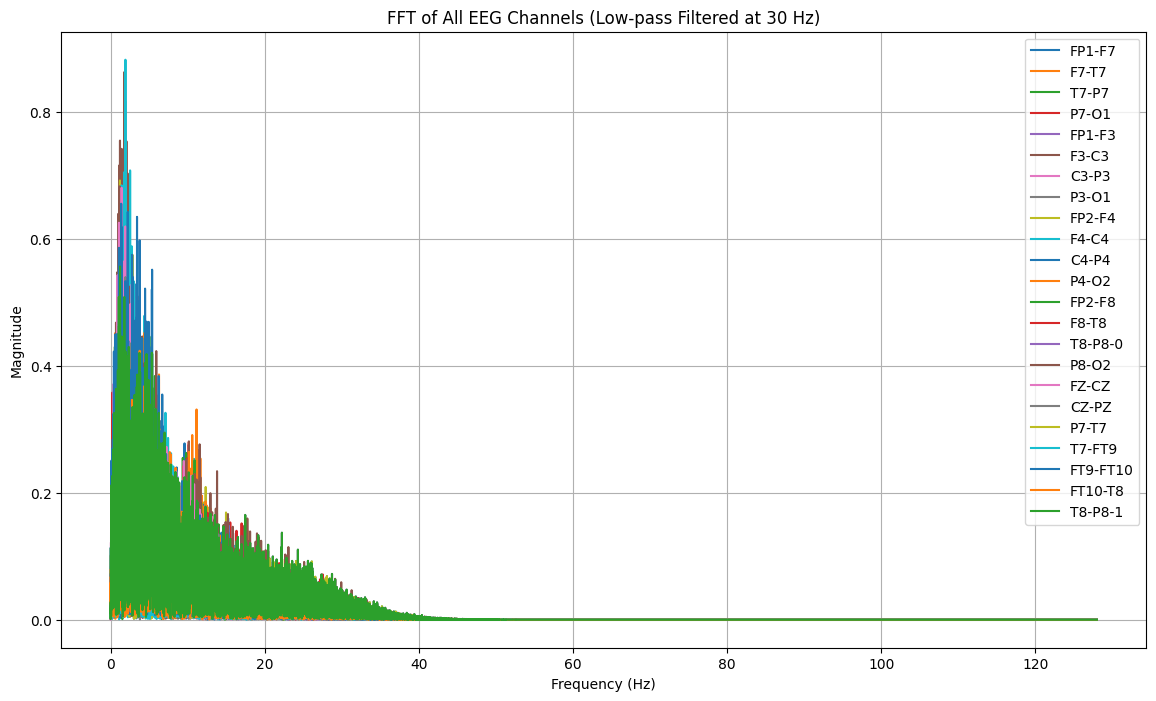

In [ ]:
# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    if channel in filtered_df.columns:  # Memastikan saluran ada dalam data
        signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
        plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Low-pass Filtered at 30 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1088:
        return "tidak kejang"
    elif 1088 <= row['Time'] < 1239:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

         Time       seizure    FP1-F7     F7-T7     T7-P7     P7-O1  \
0  968.000000  tidak kejang  0.000046  0.000129  0.000028 -0.000206   
1  968.003906  tidak kejang  0.000045  0.000130  0.000034 -0.000208   
2  968.007812  tidak kejang  0.000044  0.000130  0.000039 -0.000210   
3  968.011719  tidak kejang  0.000044  0.000128  0.000043 -0.000210   
4  968.015625  tidak kejang  0.000044  0.000123  0.000046 -0.000209   

         FP1-F3     F3-C3     C3-P3     P3-O1  ...     F8-T8   T8-P8-0  \
0 -2.072132e-07  0.000023  0.000048 -0.000072  ... -0.000018 -0.000002   
1 -7.916793e-08  0.000029  0.000042 -0.000070  ... -0.000017 -0.000006   
2  1.611014e-07  0.000034  0.000036 -0.000067  ... -0.000017 -0.000009   
3  6.197229e-07  0.000038  0.000029 -0.000063  ... -0.000016 -0.000011   
4  1.356970e-06  0.000040  0.000021 -0.000058  ... -0.000015 -0.000010   

      P8-O2     FZ-CZ     CZ-PZ     P7-T7    T7-FT9  FT9-FT10   FT10-T8  \
0 -0.000050 -0.000108 -0.000007 -0.000028 -0.000062 -

In [ ]:
# Menghitung jumlah data kejang dan tidak kejang pada data yang sudah difilter
TA_1['seizure'].value_counts()

,count
seizure,
tidak kejang,61440
kejang,38656


In [ ]:
# Menghitung durasi data pada data yang sudah difilter
# Hitung jumlah sampel
jumlah_sampel = len(TA_1)

# Frekuensi sampling (misal, 256 Hz)
fs = 256  # Sesuaikan dengan frekuensi sampling EEG Anda

# Menghitung durasi waktu total
durasi_total = jumlah_sampel / fs
print(f"Durasi total rekaman EEG: {durasi_total} detik")

Durasi total rekaman EEG: 391.0 detik


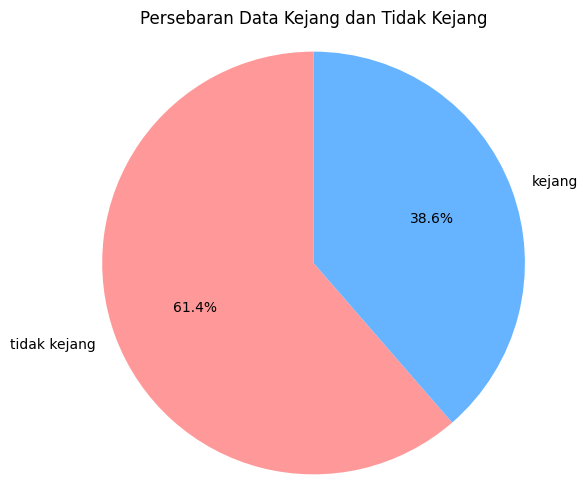

In [ ]:
# membuat plot perseberan data kejang dan tidak kejang

# Menghitung jumlah data untuk setiap kategori (kejang dan tidak kejang)
seizure_counts = TA_1['seizure'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Menambahkan judul
plt.title('Persebaran Data Kejang dan Tidak Kejang')

# Menampilkan pie chart
plt.axis('equal')  # Menjaga chart tetap berbentuk lingkaran
plt.show()

In [ ]:
# Simpan data yang sudah dilabel jadi kejang dan tidak kejang
TA_1.to_csv("/content/drive/MyDrive/TA/labelingseizure_chb05_13.csv", index=False)

In [ ]:
# mengklasifikasikan menggunakan random forest

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Make sure to import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import the function from the correct module

# Misalkan df adalah dataframe yang Anda miliki, dengan kolom 'seizure' yang berisi label "kejang" dan "tidak kejang"
# Contoh data:
# df = pd.read_csv('data.csv')

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Import the necessary module
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))


# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      kejang       1.00      0.97      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.99     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.99      0.99      0.99     20020

Akurasi: 0.9853646353646354
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      0.97      0.98      7779
tidak kejang       0.98      1.00      0.99     12241

    accuracy                           0.99     20020
   macro avg       0.99      0.98      0.98     20020
weighted avg       0.99      0.99      0.99     20020



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Menentukan fitur (X) dan label (y)
X = TA_1.drop(['Time', 'seizure'], axis=1)  # Menghapus kolom 'Time' dan 'seizure' dari fitur
y = TA_1['seizure']  # Label target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat dan melatih model SVM
model = SVC(kernel='linear', random_state=42)  # SVC dengan kernel linear
model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi pada data pengujian:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi pada data pengujian:\n", classification_report(y_test, y_pred))

# Evaluasi pada data pelatihan
y_train_pred = model.predict(X_train)
print("Akurasi pada data pelatihan:", accuracy_score(y_train, y_train_pred))
print("Laporan Klasifikasi pada data pelatihan:\n", classification_report(y_train, y_train_pred))



Akurasi pada data pengujian: 0.6114385614385615


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Laporan Klasifikasi pada data pengujian:
               precision    recall  f1-score   support

      kejang       0.00      0.00      0.00      7779
tidak kejang       0.61      1.00      0.76     12241

    accuracy                           0.61     20020
   macro avg       0.31      0.50      0.38     20020
weighted avg       0.37      0.61      0.46     20020

Akurasi pada data pelatihan: 0.6144038163744443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Laporan Klasifikasi pada data pelatihan:
               precision    recall  f1-score   support

      kejang       0.00      0.00      0.00     30877
tidak kejang       0.61      1.00      0.76     49199

    accuracy                           0.61     80076
   macro avg       0.31      0.50      0.38     80076
weighted avg       0.38      0.61      0.47     80076



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


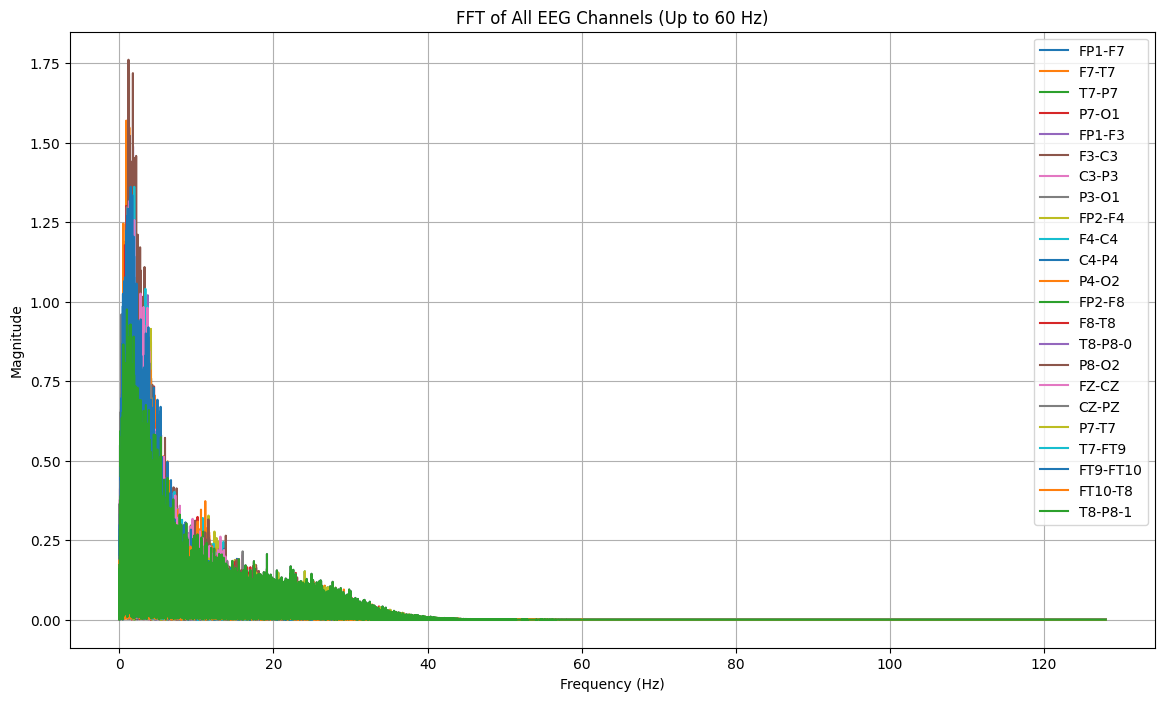

In [ ]:
from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk membuat filter low-pass
def low_pass_filter(data, cutoff, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate  # Frekuensi Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisasi frekuensi cutoff
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Koefisien filter
    filtered_data = filtfilt(b, a, data, axis=1)  # Terapkan filter pada data
    return filtered_data

# Parameter untuk filter
cutoff_freq = 30  # Frekuensi cutoff dalam Hz
sampling_rate = 256  # Frekuensi sampling (dalam data EEG Anda)
filter_order = 4  # Orde filter

# Terapkan filter pada data EEG
filtered_data = low_pass_filter(data, cutoff_freq, sampling_rate, filter_order)

# Membuat DataFrame dari data yang telah difilter
filtered_df = pd.DataFrame(filtered_data.T, columns=channel_names)
filtered_df['Time'] = times

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
    fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
    plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels (Up to 60 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()



In [ ]:
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1088:
        return "tidak kejang"
    elif 1088 <= row['Time'] < 1239:
        return "kejang"
    else:
        return "tidak kejang"

# Menyalin data1 ke df1 dan menambahkan kolom 'seizure' berdasarkan fungsi di atas
TA_1 = filtered_df.copy()
TA_1['seizure'] = filtered_df.apply(label_seizure, axis=1)

# Menampilkan hasil
print(TA_1[['Time', 'seizure', 'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']].head())

       Time       seizure        FP1-F7     F7-T7     T7-P7     P7-O1  \
0  0.000000  tidak kejang -7.218558e-06 -0.000040 -0.000053 -0.000049   
1  0.003906  tidak kejang -3.909135e-06 -0.000022 -0.000029 -0.000027   
2  0.007812  tidak kejang -1.169713e-06 -0.000008 -0.000010 -0.000009   
3  0.011719  tidak kejang  6.480001e-07  0.000001  0.000003  0.000002   
4  0.015625  tidak kejang  1.479772e-06  0.000005  0.000007  0.000006   

     FP1-F3     F3-C3     C3-P3         P3-O1  ...         F8-T8   T8-P8-0  \
0  0.000101 -0.000163 -0.000078 -9.587399e-06  ... -6.052542e-06 -0.000053   
1  0.000056 -0.000090 -0.000044 -3.924996e-06  ... -3.438750e-06 -0.000029   
2  0.000019 -0.000030 -0.000017  2.592666e-07  ... -1.270287e-06 -0.000010   
3 -0.000004  0.000007  0.000002  2.031684e-06  ...  2.019745e-07  0.000002   
4 -0.000013  0.000022  0.000010  1.381066e-06  ...  9.836498e-07  0.000007   

          P8-O2     FZ-CZ     CZ-PZ     P7-T7    T7-FT9  FT9-FT10   FT10-T8  \
0  2.911091e-

In [ ]:
# menghitung jumlah data kejang dan tidak kejang
TA_1['seizure'].value_counts()

,count
seizure,
tidak kejang,882944
kejang,38656


In [ ]:
# menghitung durasi data
# Hitung jumlah sampel
jumlah_sampel = len(TA_1)

# Frekuensi sampling (misal, 256 Hz)
fs = 256  # Sesuaikan dengan frekuensi sampling EEG Anda

# Menghitung durasi waktu total
durasi_total = jumlah_sampel / fs
print(f"Durasi total rekaman EEG: {durasi_total} detik")

Durasi total rekaman EEG: 3600.0 detik


# dibawah ini gak dipake

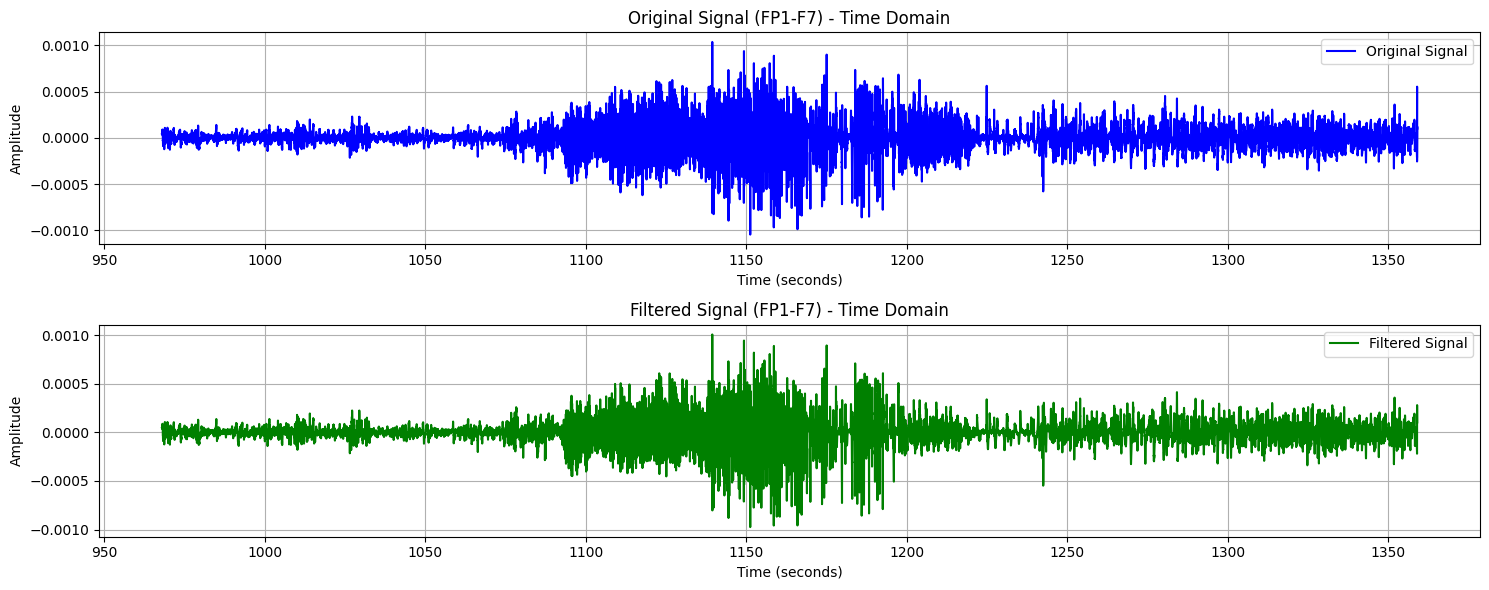

In [ ]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Fungsi untuk membuat filter low-pass
def low_pass_filter(data, cutoff_freq, sample_rate, order=4):
    nyquist = 0.5 * sample_rate  # Frekuensi Nyquist
    normal_cutoff = cutoff_freq / nyquist  # Normalisasi cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Filter desain
    filtered_data = filtfilt(b, a, data)  # Aplikasi filter
    return filtered_data

# Parameter filtering
cutoff_frequency = 30  # Frekuensi cutoff low-pass (30 Hz, sesuaikan kebutuhan)
sample_rate = 256  # Sampling rate dari data (256 Hz)

# Pilih salah satu channel untuk analisis (misal: 'FP1-F7')
channel_to_plot = 'FP1-F7'
original_signal = TA1[channel_to_plot].values  # Sinyal asli

# Terapkan low-pass filter
filtered_signal = low_pass_filter(original_signal, cutoff_frequency, sample_rate)

# Visualisasi sinyal sebelum dan setelah filtering
plt.figure(figsize=(15, 6))

# Plot sinyal sebelum filtering
plt.subplot(2, 1, 1)
plt.plot(TA1['Time'], original_signal, label="Original Signal", color='blue')
plt.title(f"Original Signal ({channel_to_plot}) - Time Domain")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot sinyal setelah filtering
plt.subplot(2, 1, 2)
plt.plot(TA1['Time'], filtered_signal, label="Filtered Signal", color='green')
plt.title(f"Filtered Signal ({channel_to_plot}) - Time Domain")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Tampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt

# Fungsi untuk membuat dan menerapkan low-pass filter
def apply_lowpass_filter(data, cutoff_freq, sample_rate, order=4):
    """
    Menerapkan filter low-pass Butterworth pada data EEG.

    Parameters:
    - data: Data EEG (numpy array atau DataFrame)
    - cutoff_freq: Frekuensi cut-off filter (Hz)
    - sample_rate: Frekuensi sampling (Hz)
    - order: Order filter (default: 4)

    Returns:
    - Filtered data (numpy array atau DataFrame)
    """
    nyquist = 0.5 * sample_rate  # Frekuensi Nyquist
    normal_cutoff = cutoff_freq / nyquist  # Cutoff dalam domain normalisasi
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Desain filter
    filtered_data = filtfilt(b, a, data, axis=0)  # Terapkan filter secara forward-backward
    return filtered_data

# Parameter filter
cutoff_freq = 40  # Frekuensi cut-off (misal: 40 Hz)
sample_rate = 256  # Frekuensi sampling

# Terapkan low-pass filter ke setiap kanal EEG (kecuali kolom 'Time')
eeg_columns = df_cut.columns[:-1]  # Kolom EEG (kecuali waktu)
filtered_eeg_data = apply_lowpass_filter(df_cut[eeg_columns].to_numpy(), cutoff_freq, sample_rate)

# Buat DataFrame baru untuk data yang telah difilter
filtered_df = pd.DataFrame(filtered_eeg_data, columns=eeg_columns)
filtered_df['Time'] = df_cut['Time']  # Salin kolom waktu
filtered_df.head()


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000046,0.000129,0.000028,-0.000206,-1.955776e-07,0.000023,0.000048,-0.000072,-0.000069,-0.000024,...,-0.000002,-0.000050,-0.000108,-0.000007,-0.000028,-0.000062,-0.000119,-0.000017,-0.000002,NaN
1,0.000046,0.000130,0.000034,-0.000209,3.996763e-07,0.000028,0.000042,-0.000069,-0.000066,-0.000028,...,-0.000007,-0.000046,-0.000106,-0.000011,-0.000033,-0.000067,-0.000118,-0.000011,-0.000007,NaN
2,0.000045,0.000130,0.000039,-0.000211,6.555601e-07,0.000033,0.000036,-0.000066,-0.000062,-0.000031,...,-0.000011,-0.000042,-0.000103,-0.000015,-0.000038,-0.000070,-0.000118,-0.000008,-0.000011,NaN
3,0.000044,0.000129,0.000043,-0.000211,6.389763e-07,0.000038,0.000029,-0.000063,-0.000058,-0.000032,...,-0.000012,-0.000039,-0.000101,-0.000018,-0.000043,-0.000069,-0.000119,-0.000007,-0.000012,NaN
4,0.000043,0.000124,0.000046,-0.000209,8.200230e-07,0.000040,0.000021,-0.000059,-0.000053,-0.000031,...,-0.000010,-0.000037,-0.000097,-0.000022,-0.000045,-0.000067,-0.000120,-0.000009,-0.000010,NaN


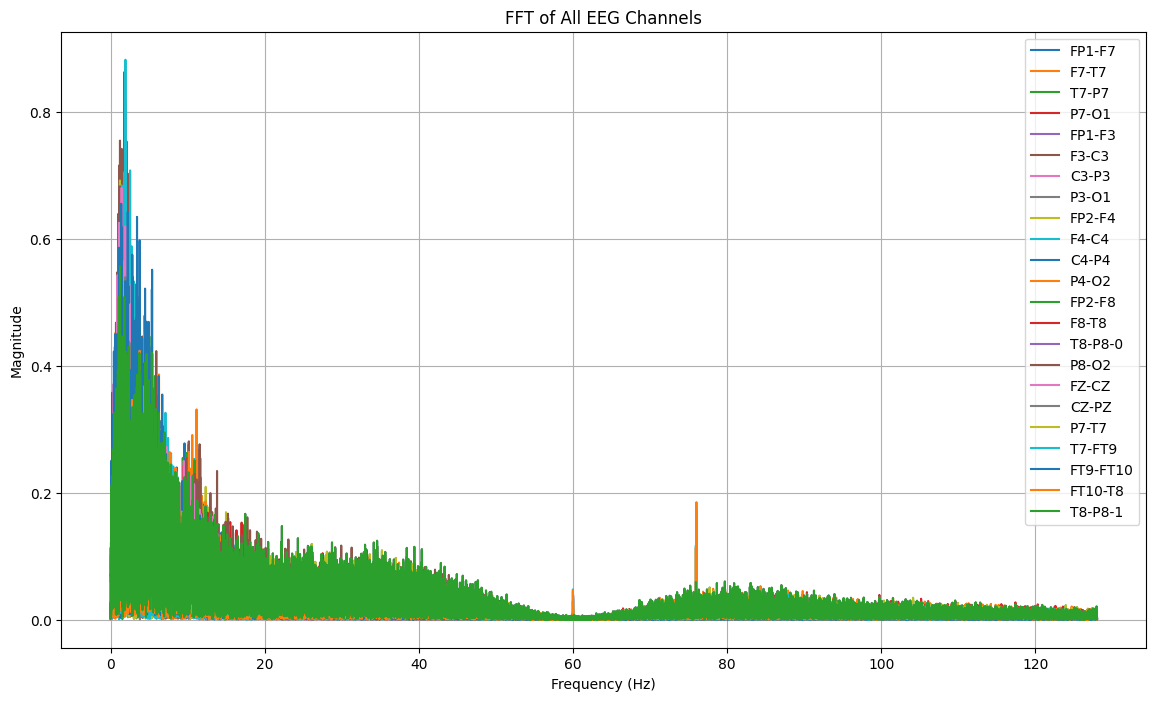

In [ ]:
# menampilkan data yang sudah dipotong dalam domain frekuensi

# Fungsi untuk melakukan FFT dan mengembalikan frekuensi serta magnitude
def compute_fft(signal, sampling_rate):
    N = len(signal)  # Panjang sinyal
    T = 1.0 / sampling_rate  # Interval sampling
    fft_vals = np.fft.fft(signal)  # Menghitung FFT
    fft_freqs = np.fft.fftfreq(N, T)  # Frekuensi
    fft_vals = np.abs(fft_vals[:N // 2])  # Magnitude (frekuensi positif saja)
    fft_freqs = fft_freqs[:N // 2]  # Frekuensi positif saja
    return fft_freqs, fft_vals

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Pilih beberapa atau semua saluran EEG untuk ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    signal = TA1[channel].values  # Mengambil sinyal dari saluran EEG
    fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
    plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()


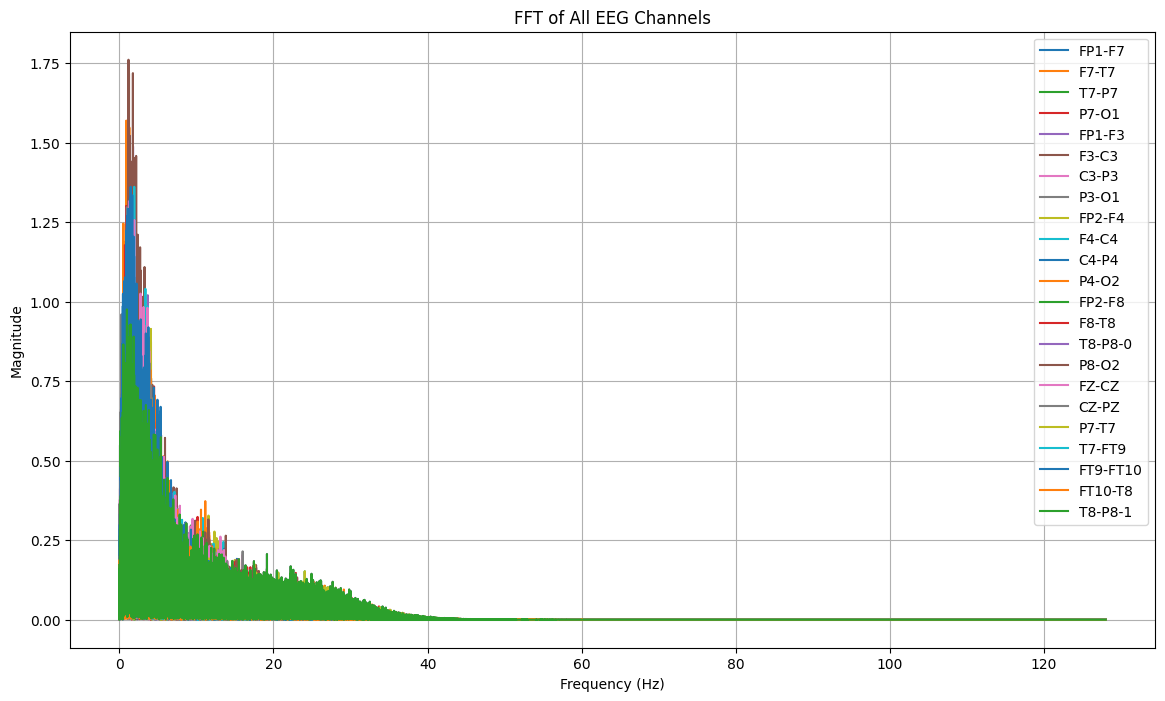

In [ ]:
# Membuat plot untuk semua saluran EEG dalam satu gambar
plt.figure(figsize=(14, 8))

for channel in channels:
    signal = filtered_df[channel].values  # Mengambil sinyal dari saluran EEG
    fft_freqs, fft_vals = compute_fft(signal, sampling_rate)  # Menghitung FFT
    plt.plot(fft_freqs, fft_vals, label=channel)  # Menambahkan ke plot

# Memberikan judul dan label pada plot
plt.title('FFT of All EEG Channels')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')  # Menampilkan legenda untuk setiap saluran
plt.grid(True)
plt.show()

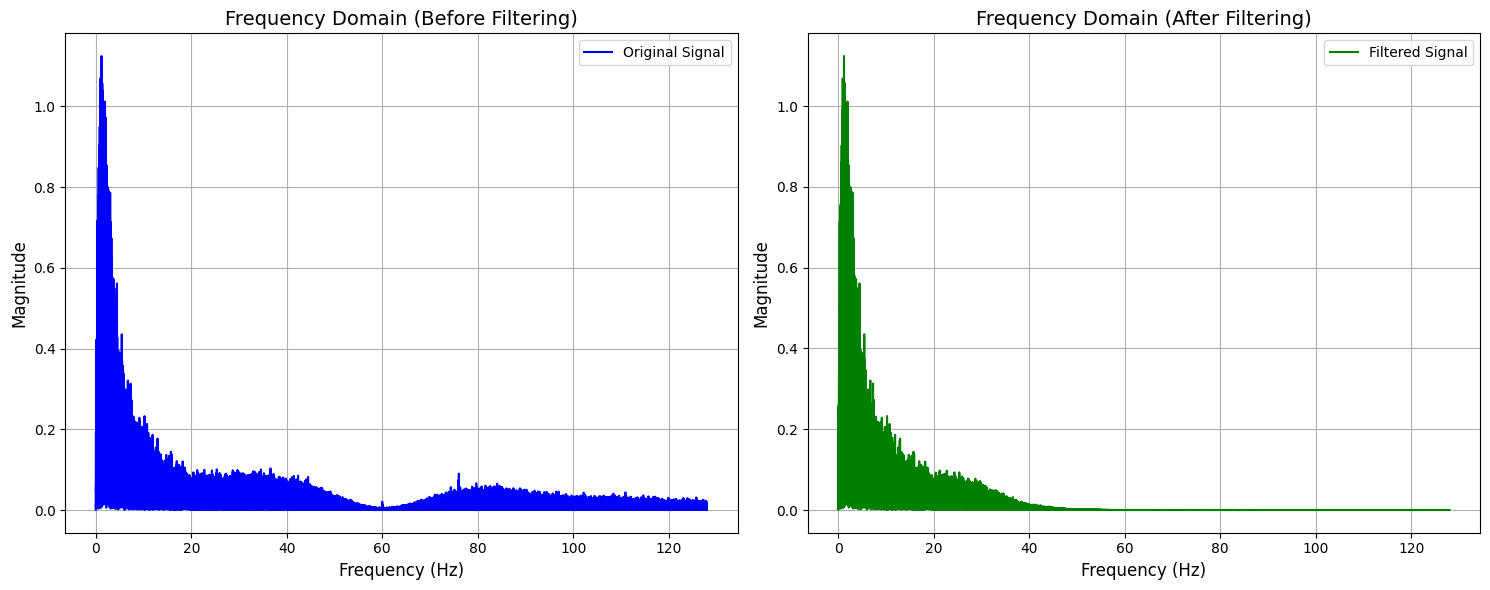

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Fungsi untuk desain low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Fungsi untuk menerapkan low-pass filter
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Fungsi untuk menghitung FFT
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    return fft_freqs[:N // 2], np.abs(fft_vals[:N // 2])

# Parameter filter
fs = 256  # Sampling rate
cutoff = 30  # Low-pass filter cutoff frequency

# Ambil data dari salah satu channel untuk demonstrasi
channel_data = df1['FP1-F7'].values  # Ganti dengan channel lain jika diinginkan

# Terapkan low-pass filter
filtered_data = lowpass_filter(channel_data, cutoff, fs)

# Hitung FFT sebelum dan setelah filter
freqs_before, fft_before = compute_fft(channel_data, fs)
freqs_after, fft_after = compute_fft(filtered_data, fs)

# Visualisasi domain frekuensi
plt.figure(figsize=(15, 6))

# Sebelum filtering
plt.subplot(1, 2, 1)
plt.plot(freqs_before, fft_before, label='Original Signal', color='blue')
plt.title('Frequency Domain (Before Filtering)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid()
plt.legend()

# Setelah filtering
plt.subplot(1, 2, 2)
plt.plot(freqs_after, fft_after, label='Filtered Signal', color='green')
plt.title('Frequency Domain (After Filtering)', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


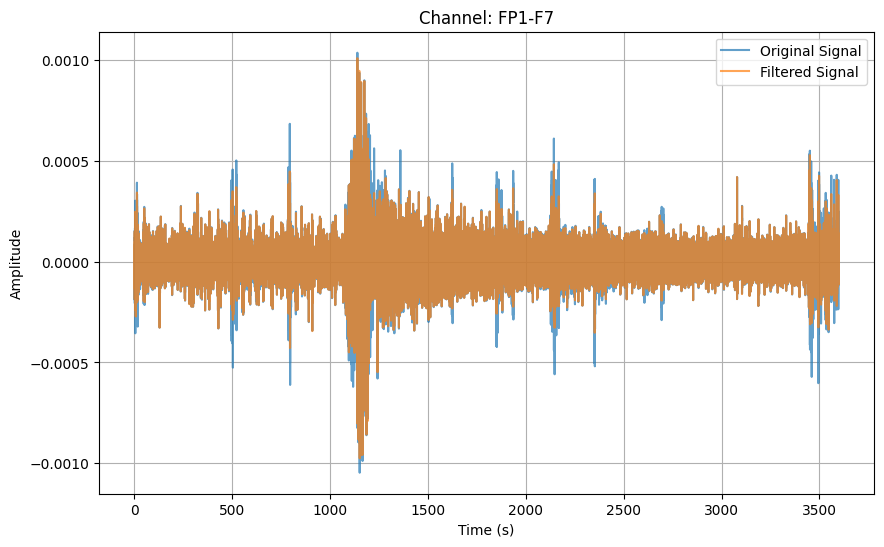

In [ ]:
# Plot salah satu channel untuk melihat hasil filter
channel_idx = 0  # Indeks channel yang ingin divisualisasikan
plt.figure(figsize=(10, 6))
plt.plot(times, data[channel_idx], label='Original Signal', alpha=0.7)
plt.plot(times, filtered_data[channel_idx], label='Filtered Signal', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Channel: {channel_names[channel_idx]}')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Fungsi untuk mendapatkan frekuensi terbesar dari FFT
def get_max_frequency(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]

    max_freq_index = np.argmax(fft_vals)
    return fft_freqs[max_freq_index], fft_vals[max_freq_index]

# Fungsi untuk mendeteksi waktu ketika magnitudo maksimum terjadi
def get_time_of_max_magnitude(channel, max_magnitude, data, time_column):
    # Cari baris di mana magnitudo terbesar muncul di data asli
    channel_signal = dataTA1[channel].values
    max_index = np.argmax(np.abs(channel_signal))  # Index dengan nilai maksimum
    time_of_max = dataTA1[time_column].iloc[max_index]  # Waktu saat magnitudo maksimum
    return time_of_max

# Sampling rate
sampling_rate = 256  # Misal 256 Hz


# Pilih saluran EEG yang akan dianalisis
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat dictionary untuk menyimpan hasil
max_frequencies = {}

# Loop untuk menghitung frekuensi terbesar dan waktu magnitudo terbesar untuk setiap saluran
for channel in channels:
    signal = dataTA1[channel].values  # Ambil sinyal dari setiap saluran EEG
    max_freq, max_magnitude = get_max_frequency(signal, sampling_rate)  # Dapatkan frekuensi dan magnitudo terbesar

    # Mendapatkan waktu ketika magnitudo terbesar terjadi
    time_of_max = get_time_of_max_magnitude(channel, max_magnitude, data1, 'Time')

    # Menyimpan hasil ke dictionary
    max_frequencies[channel] = {
        'Max Frequency (Hz)': max_freq,
        'Max Magnitude': max_magnitude,
        'Time of Max Magnitude (s)': time_of_max
    }

# Mengurutkan hasil berdasarkan waktu dari yang tercepat hingga yang terlama
sorted_by_time = sorted(max_frequencies.items(), key=lambda x: x[1]['Time of Max Magnitude (s)'])

# Menampilkan hasil akhir
print("Saluran EEG dengan frekuensi terbesar dan waktu terjadinya magnitudo maksimum (diurutkan berdasarkan waktu):")
for channel, info in sorted_by_time:
    print(f"Channel: {channel}, Max Frequency: {info['Max Frequency (Hz)']:.2f} Hz, "
          f"Magnitude: {info['Max Magnitude']:.6f}, Time: {info['Time of Max Magnitude (s)']:.6f} s")


In [ ]:
# import data yang sudah dipotong
TA1 = pd.read_csv("/content/drive/MyDrive/TA/ikutiwaktu/datacutTA_chb05_13.csv")
TA1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000046,0.000129,0.000028,-0.000206,-1.953602e-07,0.000023,0.000048,-0.000072,-0.000069,-0.000024,...,-0.000002,-0.000050,-0.000108,-0.000007,-0.000028,-0.000062,-0.000119,-1.738706e-05,-0.000002,968.000000
1,0.000047,0.000129,0.000034,-0.000209,9.768010e-07,0.000028,0.000042,-0.000069,-0.000066,-0.000028,...,-0.000008,-0.000045,-0.000103,-0.000012,-0.000033,-0.000063,-0.000118,-1.582418e-05,-0.000008,968.003906
2,0.000044,0.000129,0.000038,-0.000209,1.367521e-06,0.000033,0.000035,-0.000066,-0.000065,-0.000030,...,-0.000012,-0.000042,-0.000104,-0.000015,-0.000038,-0.000079,-0.000115,-1.953602e-07,-0.000012,968.007812
3,0.000044,0.000129,0.000044,-0.000212,9.768010e-07,0.000038,0.000029,-0.000063,-0.000057,-0.000032,...,-0.000011,-0.000041,-0.000102,-0.000020,-0.000043,-0.000071,-0.000119,-4.493284e-06,-0.000011,968.011719
4,0.000044,0.000125,0.000046,-0.000210,1.953602e-07,0.000040,0.000023,-0.000058,-0.000052,-0.000033,...,-0.000010,-0.000038,-0.000097,-0.000020,-0.000046,-0.000055,-0.000122,-1.934066e-05,-0.000010,968.015625


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Misal data Anda sudah ada dalam bentuk DataFrame 'df'
# Gantilah 'file.csv' dengan file Anda jika membaca dari CSV
# df = pd.read_csv('file.csv')

# Menghilangkan kolom 'Time' agar hanya menghitung kolom dengan data numerik
data = TA1.drop(columns=['Time'])

# Membuat dictionary untuk menyimpan hasil
summary_stats = {
    'mean': data.mean(),
    'variance': data.var(),
    'skewness': data.apply(skew),
    'kurtosis': data.apply(kurtosis)
}

# Menggabungkan semua hasil dalam satu DataFrame
summary_stats_df = pd.DataFrame(summary_stats)

# Menampilkan hasil
print(summary_stats_df)


                  mean      variance  skewness   kurtosis
FP1-F7    1.226974e-07  1.643724e-08 -0.263217   5.905571
F7-T7     1.446114e-07  2.051314e-08  0.511222   5.636099
T7-P7     9.394449e-08  1.469663e-08 -0.237857   6.967112
P7-O1     1.949503e-07  1.428823e-08  0.160217   7.129188
FP1-F3    1.827325e-07  1.532883e-08 -0.490333   5.403484
F3-C3     1.156282e-07  2.943097e-08  0.313529   6.402573
C3-P3     1.202265e-07  1.191015e-08  0.465322  19.984502
P3-O1     1.582735e-07  1.477709e-08 -0.175122  14.351611
FP2-F4    1.374212e-07  2.606727e-08 -0.404042   5.730173
F4-C4     1.903755e-07  2.916357e-08  0.299409   5.369677
C4-P4     1.404737e-07  1.982366e-08  0.184912   7.500781
P4-O2     1.484367e-07  2.506887e-08  0.139828   8.861562
FP2-F8    1.189383e-07  2.232866e-08 -0.188905   8.134290
F8-T8     2.307138e-07  2.529048e-08  0.149827   5.962018
T8-P8-0   1.516454e-07  2.819669e-08 -0.057388   7.514369
P8-O2     1.526837e-07  2.654828e-08 -0.516096  10.135377
FZ-CZ     1.92